In [15]:
#期末報告資料
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential            #序列,結構(自動全連接)
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#導入cifar10圖庫
from tensorflow.keras.datasets import cifar10
( X_train, y_train ), ( X_test, y_test ) = cifar10.load_data()
#( X_train, y_train ), ( X_test, y_test )形狀
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [17]:
#處理維度問題
#使用 keras.utils.to_categorical 對十類標籤進行 One-hot 編碼，以供後來Softmax分類。
#x通过模型之后会得到一个shape为（None,10）的数据， 而y因为没有进行one_hot编码，y.shape=(None, 1),形状不同所以不能进行计算
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
#x_train = X_train.astype('float32')/255
#x_test = X_test.astype('float32')/255
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

In [18]:
#降維
#使用 keras.utils.to_categorical 對十類標籤進行 One-hot 編碼,形成2進位置，以供後來Softmax分類。
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#訓練模型(CNN模型-分層)
#2層捲積層1層池化層1層平坦層2層連接層
model = Sequential()
#兩個二維卷積層,64個卷積核,尺寸為3×3,邊距相同,激勵函數"relu",輸入數據維度為(32*32*3)
model.add( Conv2D( filters=64,kernel_size = (3,3),input_shape = (32,32,3), activation = 'relu' ,padding="same") )
model.add( Conv2D( filters=64, kernel_size = (3,3),input_shape = (32,32,3),activation = 'relu' ,padding="same") )
#池化層窗口為2
model.add( MaxPool2D( pool_size = 2) )
#平坦層
model.add( Flatten())
#2個全連接層,神經元10到1024個,激勵函數"relu"跟"Softmax"
model.add( Dense( 1024, activation = 'relu'))
model.add( Dense( 10, activation = 'softmax'))
#設定參數為,優化器"adam",損失函數"binary_crossentropy"(交叉熵损失函数),並加入正確率
#model.compile(optimizer = 优化器，loss = 损失函数，metrics = ["准确率”])
model.compile( loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])


In [19]:
#模型結構
model.summary()
#2層捲積層1層池化層1層平坦層2層連接層


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              16778240  
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                      

In [20]:
#訓練模型並導入可視化圖表
#導入影像資料生成器
from keras.preprocessing.image import ImageDataGenerator       
#影像資料生成器參數設定
generated_data = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
                                    samplewise_std_normalization=False, zca_whitening=False, rotation_range=0,zoom_range = 0,  
                                    width_shift_range=0.1, height_shift_range=0, horizontal_flip = True, vertical_flip = False)
    
#開始訓練
#一次訓練資料量128次,訓練30次
#model.fit_generator(generated_data.flow(X_train, y_train,batch_size=128), steps_per_epoch=X_train.shape[0]//8, epochs=1, validation_data=(X_test, y_test))
history=model.fit_generator(generated_data.flow(X_train, y_train,batch_size=128),epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


C:\Users\Liu\AppData\Local\Temp/ipykernel_808/2752177235.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generated_data.flow(X_train, y_train,batch_size=128),epochs=50, validation_data=(X_test, y_test))


391/391 [==============================] - 231s 590ms/step - loss: 0.9865 - accuracy: 0.3390 - val_loss: 0.2482 - val_accuracy: 0.4136
Epoch 2/50
391/391 [==============================] - 231s 591ms/step - loss: 0.2422 - accuracy: 0.4419 - val_loss: 0.2254 - val_accuracy: 0.4908
Epoch 3/50
391/391 [==============================] - 232s 594ms/step - loss: 0.2229 - accuracy: 0.4971 - val_loss: 0.2084 - val_accuracy: 0.5433
Epoch 4/50
391/391 [==============================] - 229s 587ms/step - loss: 0.2068 - accuracy: 0.5442 - val_loss: 0.1986 - val_accuracy: 0.5736
Epoch 5/50
391/391 [==============================] - 226s 578ms/step - loss: 0.1952 - accuracy: 0.5779 - val_loss: 0.1929 - val_accuracy: 0.5873
Epoch 6/50
391/391 [==============================] - 226s 578ms/step - loss: 0.1848 - accuracy: 0.6065 - val_loss: 0.1864 - val_accuracy: 0.6053
Epoch 7/50
391/391 [==============================] - 226s 577ms/step - loss: 0.1767 - accuracy: 0.6279 - val_loss: 0.1801 - val_accura

In [21]:
#算模型好不好
from sklearn.metrics import roc_auc_score

predictions= model.predict( X_test )
predictions[0],y_test[0]
roc_auc_score( y_test, predictions )  #越接近1越好

0.9488506777777779

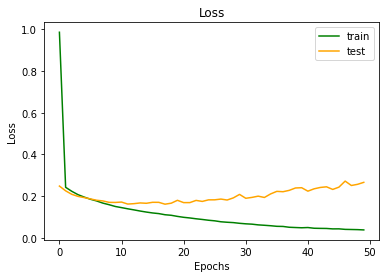

In [22]:
#訓練結果做成圖表(損失值與次數)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],c = "green")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

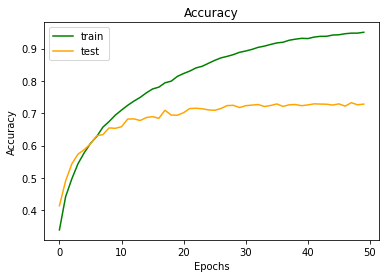

In [23]:
#訓練結果做成圖表(正確率與數字)
plt.plot(history.history["accuracy"],c = "green")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [24]:
#儲存模型
model.save("cifar10_train.h5")

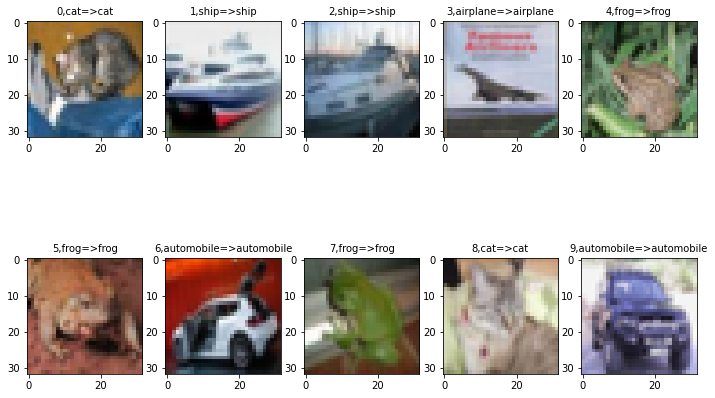

In [29]:
#可視化預測結果
#定義標籤
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
#定義顯示圖像查及其對應標籤的運作
def plot_images_labels_prediction(images,             # 圖像列表
                                  labels,             # 標籤列表 
                                  prediction,         # 預測值列表
                                  index,              # 從index開始顯示
                                  num=5):            # 一次顯示5個

    fig=plt.gcf()                                     #獲取當前圖表Get Current Figure 
    fig.set_size_inches (12, 8)                       #此吋大小
    if num > 10:
        num=10
    for i in range(0,num):
        ax=plt.subplot (2, 5, i+ 1)                       
        ax.imshow(images[index],cmap='binary')
          #顯示圖表標題信息
        title=str(i)+","+ label_dict[np.argmax(labels[index])] 
        if len(prediction) > 0:
            title+='=>' +label_dict[np. argmax(predictions[index])]

        ax.set_title(title, fontsize = 10)
        index += 1

    plt.show()

plot_images_labels_prediction(X_test,y_test,predictions,0,10)

In [ ]:
#參考資料-模型建立(內容)
#https://keras.io/zh/examples/cifar10_cnn/
#80%複製20%改寫改寫其中模型部分

In [ ]:
#參考資料-訓練結果做成圖表(內容)
#https://www.kaggle.com/code/erkamk/brain-tumor-classification?scriptVersionId=58429956
#內容70%複製30%改寫其中訓練結果做成圖表的部份(11章範例2)
#https://vimsky.com/zh-tw/examples/detail/python-method-keras.preprocessing.image.ImageDataGenerator.html
#改寫示例5: train_model的資料
#參考資料(程式)
#epochs =20  
#batch_size = 128
#datagen = ImageDataGenerator( featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False,  
        #samplewise_std_normalization=False, zca_whitening=False, rotation_range=0,zoom_range = 0,width_shift_range=0,  
        #height_shift_range=0,  horizontal_flip=True,  vertical_flip=False) 
#history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              #epochs = epochs, validation_data = (X_test,y_test),
                              #steps_per_epoch = X_train.shape[0] // batch_size)   

In [ ]:
#參考資料-可視化預測結果
#https://blog.csdn.net/m0_59324564/article/details/124998992
#複製9.可視化預測結果程式

In [27]:
#參考資料-其他部分
#自行上網自學

In [5]:
#通過卷積和池化，然後得到了眾多特徵，稠密層的每一個節點都與這些特徵節點相連構成稠密層(全連接層)。稠密層的作用就是分類。
#簡單的說就是每一個特徵節點手裡握著一定的權重來決定輸入是屬於那個分類，最終全部特徵的權重共同決定了輸入所屬分類的權重或概率。
#https://www.uj5u.com/houduan/291489.html